# Time Series(시계열 데이터)
- 주기성(Periodicity), 추세(Trend), 계절성(Seasonality) 존재
- KOSPI 주가 데이터

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [12]:
from fbprophet import Prophet

- 수집할 날짜 지정

In [5]:
start = datetime(2010, 1, 1)
end = datetime(2020, 6, 30)

### 1) 종목별 정보 수집
- 종목번호: '035250.KS'

In [6]:
GL = pdr.DataReader(name = '035250.KS', # 강원랜드 주식
                    data_source = 'yahoo',
                    start = start,
                    end = end)

# yahoo finance 혹은 증권거래소
# 실시간 api로 불러올 수도 있다
# 2020년 3월, 코로나로 급락

### 2) 수집된 주가정보 확인
- Close: 종가

In [7]:
GL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16350.0,16100.0,16250.0,16200.0,525902.0,12243.438477
2010-01-05,16200.0,15900.0,16200.0,16000.0,828676.0,12092.284180
2010-01-06,16250.0,15900.0,16000.0,16150.0,884522.0,12205.650391
2010-01-07,16400.0,16150.0,16200.0,16250.0,911975.0,12281.226562
2010-01-08,16400.0,16150.0,16200.0,16250.0,921984.0,12281.226562


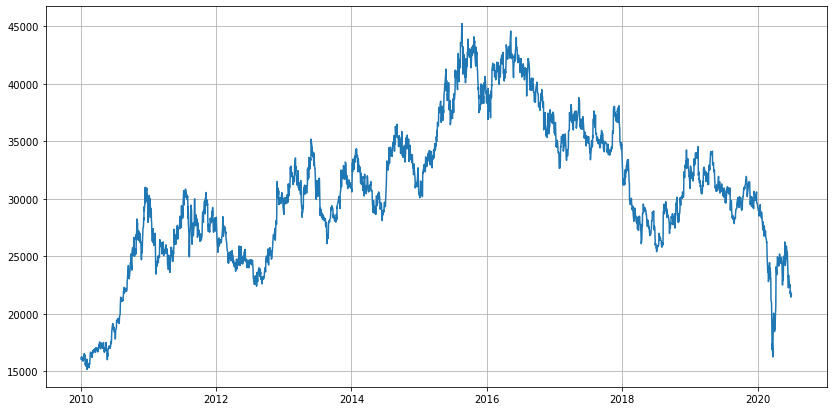

In [8]:
plt.figure(figsize = (14, 7))
plt.plot(GL['Close'])
plt.grid()
plt.show()

## 1. 종목 주가 예측테스트

### 1) 예측 테스트를 위한 데이터셋
- 2010년 01월 01일 ~ 2019년 12월 31일

In [9]:
GL_trunc = GL[:'2019-12-31']

GL_trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-23,30100.0,29700.0,29900.0,29950.0,254298.0,29069.117188
2019-12-24,30300.0,29900.0,29900.0,30300.0,216787.0,29408.822266
2019-12-26,30650.0,30200.0,30500.0,30600.0,176187.0,29700.000000
2019-12-27,29800.0,29500.0,29750.0,29650.0,318395.0,29650.000000
2019-12-30,29800.0,29450.0,29800.0,29600.0,160145.0,29600.000000


### 2) 날짜(GL_trunc)와 종가(Close)로 데이터프레임 생성

In [10]:
DF = pd.DataFrame({'ds' : GL_trunc.index, 'y': GL_trunc['Close']})

DF.reset_index(inplace = True)

DF

,Date,ds,y
0,2010-01-04,2010-01-04,16200.0
1,2010-01-05,2010-01-05,16000.0
2,2010-01-06,2010-01-06,16150.0
3,2010-01-07,2010-01-07,16250.0
4,2010-01-08,2010-01-08,16250.0
...,...,...,...
2455,2019-12-23,2019-12-23,29950.0
2456,2019-12-24,2019-12-24,30300.0
2457,2019-12-26,2019-12-26,30600.0
2458,2019-12-27,2019-12-27,29650.0


In [11]:
del DF['Date']

DF.head()

,ds,y
0,2010-01-04,16200.0
1,2010-01-05,16000.0
2,2010-01-06,16150.0
3,2010-01-07,16250.0
4,2010-01-08,16250.0


### 3) fbprophet Package
- 페이스북에서 개발한 시계열 예측 패키지
- 경험적 규칙(Heuristic Rule)
  - Prophet 객체 생성 후 DF를 .fit()에 적용

In [13]:
m = Prophet()
m.fit(DF) # 모델 학습 완료

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


- 예측날짜 구간 생성
  - 2020년 07월 01일까지 생성
  - periods = 184

In [14]:
future = m.make_future_dataframe(periods = 184)

- 예측날짜 구간 확인

In [15]:
future.tail()

,ds
2639,2020-06-27
2640,2020-06-28
2641,2020-06-29
2642,2020-06-30
2643,2020-07-01


- 생성된 예측날짜 구간으로 예측 실행

In [16]:
forecast = m.predict(future)

- 예측결과 시각화
  - 산점도: 원래값(y)
  - 실선: 예측값(y_hat)

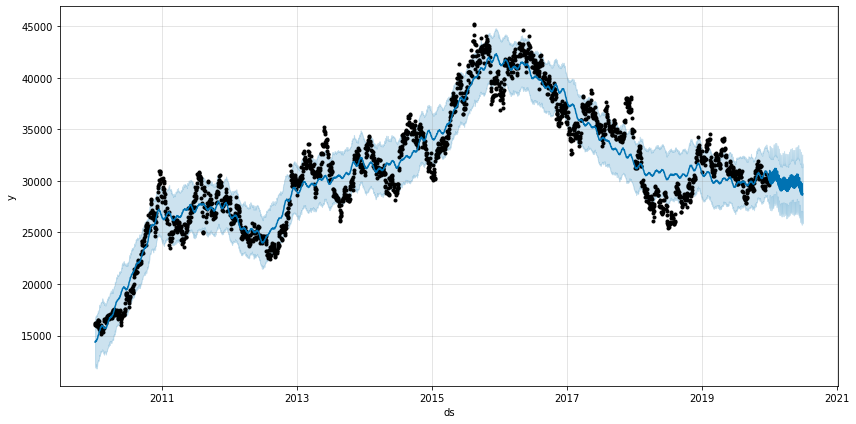

In [21]:
m.plot(forecast, figsize = (12, 6));

- 선형회귀 및 weekly, yearly 성분별 시각화

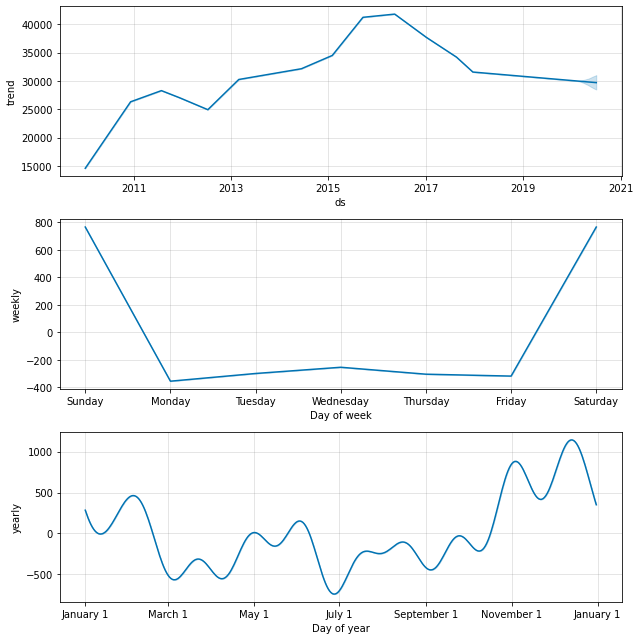

In [20]:
m.plot_components(forecast);

### 4) 실제값과 예측값 비교 시각화

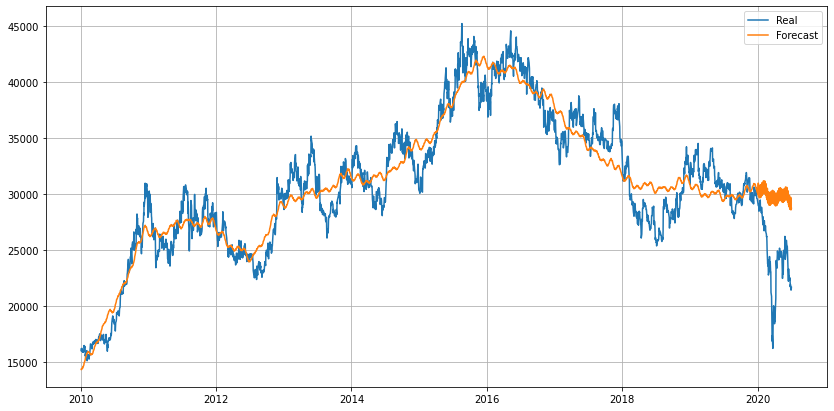

In [24]:
plt.figure(figsize = (14, 7))
plt.plot(GL.index, GL['Close'], label = 'Real')
plt.plot(forecast['ds'], forecast['yhat'], label = 'Forecast')
plt.grid()
plt.legend()
plt.show()